In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data_row=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\preprocess\heart.csv")

In [3]:
data=data_row.copy()

In [4]:
data.replace({"	Age":0,"RestingBP":0,"Cholesterol":0,"MaxHR":0},np.nan,inplace=True)

In [5]:
data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [6]:
data_categorical=data.select_dtypes("object")
data_numeric=data.select_dtypes(["Float64","int64"]).iloc[:,:-1]
y=data.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_enc = LabelEncoder()

In [9]:
data_categorical=data_categorical.apply(label_enc.fit_transform)

In [10]:
data_categorical.nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [11]:
data[["ChestPainType","RestingECG","ST_Slope"]]

,ChestPainType,RestingECG,ST_Slope
0,ATA,Normal,Up
1,NAP,Normal,Flat
2,ATA,ST,Up
3,ASY,Normal,Flat
4,NAP,Normal,Up
...,...,...,...
913,TA,Normal,Flat
914,ASY,Normal,Flat
915,ASY,Normal,Flat
916,ATA,LVH,Flat


In [12]:
data_cat_bin = data_categorical[["Sex", "ExerciseAngina"]]

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe_enc=OneHotEncoder()

In [15]:
data_ohe=ohe_enc.fit_transform(data[["ChestPainType","RestingECG","ST_Slope"]].values).toarray()

In [16]:
data=np.concatenate([data_numeric.values,data_cat_bin.values,data_ohe],axis=1)

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer=KNNImputer(n_neighbors=3)

In [19]:
data=imputer.fit_transform(data)

In [20]:
np.isnan(data).sum()

0

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [23]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.0,0.507042,0.431818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.533333,0.208494,1.0,0.570423,0.681818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.416667,0.088803,0.0,0.387324,0.431818,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,0.591837,0.416667,0.291506,0.0,0.802817,0.295455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X=data

In [25]:
len(X)

918

In [26]:
from sklearn.svm import SVC

In [27]:
from sklearn import metrics

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [30]:
svm_clf=SVC()
svm_clf.fit(X_train,y_train)

SVC()

In [31]:
y_pred_train=svm_clf.predict(X_train)

In [32]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       290
           1       0.87      0.91      0.89       352

    accuracy                           0.88       642
   macro avg       0.88      0.88      0.88       642
weighted avg       0.88      0.88      0.88       642



In [33]:
y_pred=svm_clf.predict(X_test)

In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       120
           1       0.85      0.92      0.88       156

    accuracy                           0.86       276
   macro avg       0.87      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



In [35]:
svm_clf.score(X_test,y_test)

0.8623188405797102

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [86]:
svm_clf=SVC()
C=np.arange(0.5,2,0.2)
gamma = np.logspace(-3,3,7)
params={
      "C":C,
      "kernel":["rbf"]
}
cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=567)
clf=GridSearchCV(svm_clf,param_grid=params,scoring="accuracy",cv=cv,verbose=1,return_train_score=True)


In [87]:
clf.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=567, test_size=0.25, train_size=None),
             estimator=SVC(),
             param_grid={'C': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [88]:
clf.score(X,y)

0.8856209150326797

In [89]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [90]:
train_score=clf.cv_results_["mean_train_score"]
test_score=clf.cv_results_["mean_test_score"]

In [83]:
train_score.max()

0.8909883720930234

In [91]:

test_score.max()

0.8521739130434781

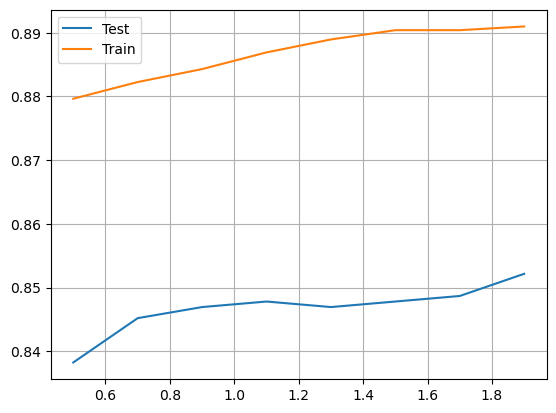

In [92]:
plt.plot(C,test_score,label="Test")
plt.plot(C,train_score,label="Train")
plt.legend()
plt.grid(True)
plt.show()